## 1. Carga y exploración de datos

In [30]:
# Importa las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Carga el fichero empleados.csv
df_empleados = pd.read_csv("empleados_v2.0.csv", sep=",")

# Muestra las primeras filas del conjunto de datos
print(df_empleados.head())

# Comprueba si hay nulos o inconsistencias (si salen false, es que el valor no es nulo)
print(df_empleados.isnull())

   edad  experiencia  formacion  horas_extra  salario
0    50           24          1            0     2616
1    36            8          2            8     2372
2    29            2          3            5     1955
3    42           18          1           15     2852
4    40           19          1            2     2750
     edad  experiencia  formacion  horas_extra  salario
0   False        False      False        False    False
1   False        False      False        False    False
2   False        False      False        False    False
3   False        False      False        False    False
4   False        False      False        False    False
5   False        False      False        False    False
6   False        False      False        False    False
7   False        False      False        False    False
8   False        False      False        False    False
9   False        False      False        False    False
10  False        False      False        False    False
11  

## 2. Análisis exploratorio

            edad  experiencia  formacion  horas_extra      salario
count  60.000000    60.000000  60.000000    60.000000    60.000000
mean   38.616667    14.183333   1.850000     9.416667  2689.783333
std    10.247929    10.796251   0.819777     6.747986   784.570077
min    23.000000     0.000000   1.000000     0.000000  1445.000000
25%    29.750000     3.750000   1.000000     2.750000  1972.250000
50%    38.500000    14.500000   2.000000     8.000000  2607.000000
75%    46.250000    24.000000   3.000000    16.000000  3196.000000
max    57.000000    35.000000   3.000000    19.000000  4266.000000


Text(0.5, 1.0, 'Gráfica entre experiencia y salario')

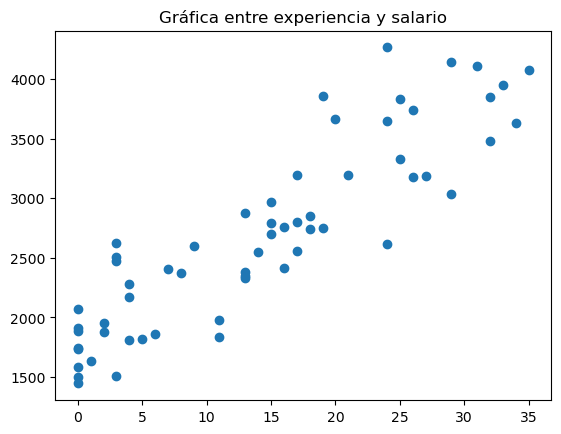

In [31]:
# Calcula estadisticas descriptivas básicas
print(df_empleados.describe())

# Representa gráficamente la relacion entre variables independientes y el salario
plt.scatter(df_empleados["experiencia"], df_empleados["salario"])
plt.title("Gráfica entre experiencia y salario")

## 3. Preparación de los datos

In [32]:
# Separa las variables independientes (X), de las variables dependientes (Y)
x = df_empleados.drop(columns=["salario"])
y = df_empleados["salario"]

# Divide el conjunto de datos en conjunto de entrenamiento y prueba (por ejemplo, 80%, 20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Justifica brevemente porque es necesaria esta división
# Es necesaria para poder evaluar correctamente el modelo, a partir del 80%, el modelo aprende patrones.
# El conjunto de prueba al 20% comprueba como el modelo se comporta con nuevos datos reales

## 4. Construcción del modelo

In [33]:
# Crea un modelo de regresión lineal
# Entrena el modelo con los datos de entrenamiento
modelo = LinearRegression()
modelo.fit(x_train, y_train)

print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)
print("Columnas:", x_train.columns.tolist())

# Muestra la ecuacion del modelo entrenado
df_ecuacion = pd.DataFrame({"Variable" : x_train.columns, "Coeficientes" : modelo.coef_})
print(df_ecuacion)

#ecuacion = f"salario = {modelo.intercept_:.2f}"
#for nombre, coef in zip(x_train.columns, modelo.coef_):
#    ecuacion += f" + {coef:.2f}*{nombre}"
#print("Esta es la ecuación: ", ecuacion)

Intercepto: 702.3418160617064
Coeficientes: [ 14.56673129  50.71222923 259.84712348  23.34702927]
Columnas: ['edad', 'experiencia', 'formacion', 'horas_extra']
      Variable  Coeficientes
0         edad     14.566731
1  experiencia     50.712229
2    formacion    259.847123
3  horas_extra     23.347029


## 5. Evaluación del modelo

In [34]:
# Realiza predicciones sobre el conjunto de prueba
y_pred = modelo.predict(x_test)

# Calcula al menos una métrica de evalaución
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 :", r2)
print("MAE:", mae)
print("MSE:", mse)

# Interpreta el resultado obtenido
#R2 cercano a 1 = buen ajuste; aquí indica qué % de la variabilidad
#del salario explica el modelo. Un MAE bajo significa poco error medio

R2 : 0.8840339943646127
MAE: 209.00804909756164
MSE: 68985.44188752565


## 6. Interpretación

### Explica que significado tienen los coeficientes del modelo
Cada coeficiente del modelo indica cuánto cambia el salario al aumentar 1 unidad esa variable, manteniendo las demás constantes.

### Indica a que variable tiene mayor impacto en el salario segun el modelo
La variable con mayor impacto será la que tenga el coeficiente más grande en valor absoluto tras ajustar el modelo con esos datos.

### Comenta una posible limitacion del modelo construido
Una posible limitación es que el modelo solo usa esas cuatro columnas y supone relación lineal, pero en realidad el salario también puede depender de otros factores (departamento, ciudad, empresa, etc.) y de relaciones no lineales entre variables